# Data Wrangling, Analysis, and Visualization for WeRateDogs Dataset

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Business Understanding

### Brief
This work is an extension of my own work for another ND (Data Analyst Nanodegree) for this ND (Data Scientist Nanodegree).
I have raised a request to Udacity support to check whether this allowed and they permitted it. 

The project was to Gather, Assess, Clean and Analyse data from Twitter.

There are three data sources in the project:

1. twitter-archive-enhanced.csv: a file provided by Udacity contains most of the data
2. image_prediction.tsv: a file that should be downloaded programmatically using `requests` library
3. tweet_json.txt: data that gathered from Twitter API using `Tweepy` library

I am only using using two of them (1 & 3) in this project as it will be used for the analysis in the last section.

### Motivation

WeRateDogs (@dog_rates) is a very popular twitter account that regularly posts dog pictures to be rated.

The rating consists of two, which is numerator and denominator. Usually, the denominator will be 10 and the numerator can bigger than that.
However, Twitter also has features to favourites a tweet post. So, it can be used as a parameter whether a post or its content is popular or likeable as general.

But, the question is, 
1. Does the most popular dog stage also has the highest rating? 
2. Would the highest rated dog also gain more popularity?
3. Can we predict the popularity of a tweet?

#### Data Source 1 (twitter_archive_enhanced) - Offline Source

In [2]:
file_name = 'twitter-archive-enhanced.csv'
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Data Source 3 (tweet_json) - API

In [4]:
# consumer_key = ''
# consumer_secret = ''
# access_token = '' 
# access_token_secret = ''

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# start = timer()
# with open('tweet_json.txt', 'w') as outfile:
#     for tweet_id in twitter_archive_enhanced['tweet_id']:
#         try:
#             tweet_json = api.get_status(tweet_id, tweet_mode='extended')._json
#             json.dump(tweet_json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail", e, tweet_id)
#             pass
# end = timer()
# print(end - start) 

In [5]:
tweet_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt', 'r') as text:
    for line in text:                           
        content = json.loads(line)            
        tweet_id = content['id']               
        retweet_count = content['retweet_count']     
        favorite_count = content['favorite_count']   
    
        tweet_json = tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], columns=['tweet_id', 'retweet_count', 'favorite_count']))

tweet_json = tweet_json.reset_index(drop=True)
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Assess

#### Visually (Using Google Sheets)

The dataframes are assessed visually using Google Sheets. Using functions such as Find and Sort (Ascending and Descending) to find interesting data points

#### Programmatically

In [6]:
twitter_archive_enhanced.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4)

In [7]:
twitter_archive_enhanced['name'].value_counts()

None           745
a               55
Charlie         12
Cooper          11
Oliver          11
Lucy            11
Tucker          10
Lola            10
Penny           10
Winston          9
Bo               9
the              8
Sadie            8
an               7
Daisy            7
Buddy            7
Bailey           7
Toby             7
Dave             6
Koda             6
Jax              6
Bella            6
Leo              6
Stanley          6
Jack             6
Oscar            6
Rusty            6
Scout            6
Milo             6
very             5
              ... 
Binky            1
Laika            1
Peanut           1
Darla            1
Zara             1
Crawford         1
Kobe             1
Snoopy           1
Ito              1
Godzilla         1
Griswold         1
Simba            1
Trevith          1
Lucky            1
Brudge           1
William          1
Jiminus          1
Rinna            1
Sephie           1
Stefan           1
Jackie           1
Finnegus    

In [8]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
tweet_json.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [10]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,667495797102141441,3652,0
freq,1,5,179


### Issues found

#### Quality
1. [twitter_archive_enhanced] Not relevant rows such as replies and retweets (Considered as rows that has value in `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id`)
2. [twitter_archive_enhanced] High-NaN columns `(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)`
3. [twitter_archive_enhanced] Some `name` are not dog names, such as `a`, `an`, and, `the`
3. [twitter_archive_enhanced] `(722974582966214656-Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a!)` The correct rating is 13/10 not 4/20 as it can be considered as date
4. [twitter_archive_enhanced] `(682962037429899265-This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5)` 7/11 is a franchise not a rating, the correct rating is 10/10
5. [twitter_archive_enhanced] `(666287406224695296-This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv)` 1/2 is not the rating, its 9/10
6. [twitter_archive_enhanced] `(810984652412424192-Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. Keep Sam smiling by clicking and sharing this link: https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx)` 24/7 is time indicator, not rating, unfortunately this row has no explicit rating.
7. [twitter_archive_enhanced] Uncaptured numerator as float `(832215909146226688 (9.75),786709082849828864 (9.75),778027034220126208 (11.27) ,680494726643068929 (11.26))`
8. [twitter_archive_enhanced] `tweet_id` should be `string` not `int`
9. [twitter_archive_enhanced] `None` in the `name` and `stages` can be confusing as not counted as a null value
10. [twitter_archive_enhanced] `source` column has HTML tags in it.
11. In order to use categorical columns in the modelling, I will code the values in 1 and 0 in new columns. This will be added in insight 4



#### Tidiness
1. [twitter_archive_enhanced] `doggo, pupper, puppo, and fluffer` (stages) are categorical value, and each row only can be one on these not two in the same time
2. [twitter_archive_enhanced, tweet_json] All have different total rows. For example caused by several data were not found in API call for tweet_json
 


Further in this document, Quality issues will be denoted by Q1, Q2, ... and Tidy issues will be denoted by T1 and T2

## Prepare Data

In [11]:
# Copy all df to a new df that will be cleaned
twitter_archive_enhanced_cleaned = twitter_archive_enhanced.copy()
tweet_json_cleaned = tweet_json.copy()

#### Q1
##### Define
[twitter_archive_enhanced] Not relevant rows such as replies and retweets (Considered as rows that has value in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id).

Thus, such rows will be deleted.

##### Code

In [12]:
twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned[pd.isnull(twitter_archive_enhanced_cleaned['in_reply_to_status_id']+twitter_archive_enhanced_cleaned['in_reply_to_user_id'])&
pd.isnull(twitter_archive_enhanced_cleaned['retweeted_status_id']+twitter_archive_enhanced_cleaned['retweeted_status_user_id'])]

##### Test

In [13]:
twitter_archive_enhanced_cleaned.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(

#### Q2
##### Define
twitter_archive_enhanced High-NaN columns `(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)`

Drop those columns.

##### Code

In [14]:
twitter_archive_enhanced_cleaned.drop(['in_reply_to_status_id',
                  'in_reply_to_user_id',
                  'retweeted_status_id',
                  'retweeted_status_user_id',
                  'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [15]:
list(twitter_archive_enhanced_cleaned)

[&#39;tweet_id&#39;,
 &#39;timestamp&#39;,
 &#39;source&#39;,
 &#39;text&#39;,
 &#39;expanded_urls&#39;,
 &#39;rating_numerator&#39;,
 &#39;rating_denominator&#39;,
 &#39;name&#39;,
 &#39;doggo&#39;,
 &#39;floofer&#39;,
 &#39;pupper&#39;,
 &#39;puppo&#39;]

#### Q3
##### Define
[twitter_archive_enhanced] Some `name` are not dog names, such as `a`, `an`, and, `the`

Change those to null value (lowercase names)

##### Code

In [16]:
twitter_archive_enhanced_cleaned.loc[twitter_archive_enhanced_cleaned.name.str.islower(), 'name'] = np.nan

##### Test

In [17]:
twitter_archive_enhanced_cleaned['name'].value_counts()[:10]

None       603
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Winston      8
Lola         8
Sadie        8
Name: name, dtype: int64

#### Q4
##### Define
[twitter_archive_enhanced] (722974582966214656-Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a!) The correct rating is 13/10 not 4/20 as it can be considered as date

Change to the correct rating.

##### Code

In [18]:
def change_rating(id ,num, den):
    twitter_archive_enhanced_cleaned.loc[twitter_archive_enhanced_cleaned['tweet_id']==id, 'rating_numerator'] = num
    twitter_archive_enhanced_cleaned.loc[twitter_archive_enhanced_cleaned['tweet_id']==id, 'rating_denominator'] = den

change_rating(722974582966214656, 13, 10)

##### Test

In [19]:
def test_rating(id):
    print(twitter_archive_enhanced_cleaned.loc[twitter_archive_enhanced_cleaned['tweet_id']==id, ['rating_numerator','rating_denominator']])
    
test_rating(722974582966214656)

      rating_numerator  rating_denominator
1165                13                  10


#### Q5
##### Define
[twitter_archive_enhanced] (682962037429899265-This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5) 7/11 is a franchise not a rating, the correct rating is 10/10

Change the rating to 10/10

##### Code

In [20]:
change_rating(682962037429899265, 10, 10)

##### Test

In [21]:
test_rating(682962037429899265)

      rating_numerator  rating_denominator
1662                10                  10


#### Q6
##### Define 
[twitter_archive_enhanced] (666287406224695296-This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv) 1/2 is not the rating, its 9/10

##### Code

In [22]:
change_rating(666287406224695296, 9, 10)

##### Test

In [23]:
test_rating(666287406224695296)

      rating_numerator  rating_denominator
2335                 9                  10


#### Q7
##### Define
[twitter_archive_enhanced] (810984652412424192-Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. Keep Sam smiling by clicking and sharing this link: https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx) 24/7 is time indicator, not rating, unfortunately this row has no explicit rating.

Remove this row as without the ratings the row will not very useful

##### Code

In [24]:
twitter_archive_enhanced_cleaned = twitter_archive_enhanced_cleaned[twitter_archive_enhanced_cleaned['tweet_id'] != 810984652412424192]

##### Test

In [25]:
twitter_archive_enhanced_cleaned[twitter_archive_enhanced_cleaned['tweet_id'] == 810984652412424192]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Q8
##### Define
[twitter_archive_enhanced] Uncaptured numerator as float (832215909146226688 (9.75),786709082849828864 (9.75),778027034220126208 (11.27) ,680494726643068929 (11.26))

As it turns out that the numerator can be float, both numerator and denumerator should be float. Furthermore, the we also have to change the value as above.

##### Code

In [26]:
twitter_archive_enhanced_cleaned['rating_numerator'] = twitter_archive_enhanced_cleaned['rating_numerator'] .astype(float)
twitter_archive_enhanced_cleaned['rating_denominator'] = twitter_archive_enhanced_cleaned['rating_denominator'].astype(float)

change_rating(832215909146226688, 9.75, 10)
change_rating(786709082849828864, 9.75, 10)
change_rating(778027034220126208, 11.27, 10)
change_rating(680494726643068929, 11.26, 10)


##### Test

In [27]:
twitter_archive_enhanced_cleaned.info()
test_rating(832215909146226688)
test_rating(786709082849828864)
test_rating(778027034220126208)
test_rating(680494726643068929)

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 2096 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2096 non-null int64
timestamp             2096 non-null object
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
name                  1992 non-null object
doggo                 2096 non-null object
floofer               2096 non-null object
pupper                2096 non-null object
puppo                 2096 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 212.9+ KB
Empty DataFrame
Columns: [rating_numerator, rating_denominator]
Index: []
     rating_numerator  rating_denominator
695              9.75                10.0
     rating_numerator  rating_denominator
763             11.27                10.0
      rating_numerator  rating_denominator
1712         

#### Q9
##### Define
[twitter_archive_enhanced & image_predictions] tweet_id should be string not int

Change it to string

##### Code

In [28]:
twitter_archive_enhanced_cleaned['tweet_id'] = twitter_archive_enhanced_cleaned['tweet_id'].astype(str)
tweet_json_cleaned['tweet_id'] = tweet_json_cleaned['tweet_id'].astype(str)

##### Test

In [29]:
twitter_archive_enhanced_cleaned.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 2096 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2096 non-null object
timestamp             2096 non-null object
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
name                  1992 non-null object
doggo                 2096 non-null object
floofer               2096 non-null object
pupper                2096 non-null object
puppo                 2096 non-null object
dtypes: float64(2), object(10)
memory usage: 212.9+ KB


#### Q10
##### Define
[twitter_archive_enhanced] `None` in the `name` and `stages (doggo, pupper, puppo, flooffer)` can be confusing as not counted as a null value

Change it to null value

##### Code

In [30]:
def nullify_none(col):
    twitter_archive_enhanced_cleaned.loc[(twitter_archive_enhanced_cleaned[col] == 'None') , col] = np.nan
    
nullify_none('name')
nullify_none('doggo')
nullify_none('floofer')
nullify_none('pupper')
nullify_none('puppo')

##### Test

In [31]:
def check_none(col):
    print(col, len(twitter_archive_enhanced_cleaned.loc[(twitter_archive_enhanced_cleaned[col] == 'None') , col]))
    
check_none('name')
check_none('doggo')
check_none('floofer')
check_none('pupper')
check_none('puppo')

name 0
doggo 0
floofer 0
pupper 0
puppo 0


#### Q11

##### Define

Remove the html tag


##### Code

In [32]:
twitter_archive_enhanced_cleaned.source = twitter_archive_enhanced_cleaned.source.str.replace('<[^<]+?>', '') 

##### Test

In [33]:
twitter_archive_enhanced_cleaned.source.value_counts()

Twitter for iPhone     1963
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### T1
##### Define
[twitter_archive_enhanced] doggo, pupper, puppo, and fluffer (stages) are categorical value, and each row only can be one on these not two in the same time

Compile those categories in a single column called `stage`, and remove the 4 columns

#### Code

In [34]:
twitter_archive_enhanced_cleaned['stage'] = twitter_archive_enhanced_cleaned.loc[:,'doggo':'puppo'].fillna('').sum(axis=1)
twitter_archive_enhanced_cleaned.drop(['doggo',
                 'pupper',
                 'puppo',
                 'floofer'], axis = 1, inplace = True)
twitter_archive_enhanced_cleaned.loc[(twitter_archive_enhanced_cleaned['stage'] == '') , 'stage'] = np.nan

#### Test

In [35]:
twitter_archive_enhanced_cleaned.info()
twitter_archive_enhanced_cleaned[pd.notnull(twitter_archive_enhanced_cleaned['stage'])]

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 2096 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2096 non-null object
timestamp             2096 non-null object
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
name                  1389 non-null object
stage                 336 non-null object
dtypes: float64(2), object(7)
memory usage: 163.8+ KB


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo
12,889665388333682689,2017-07-25 01:55:32 +0000,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,NaN,puppo
14,889531135344209921,2017-07-24 17:02:04 +0000,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,10.0,Stuart,puppo
29,886366144734445568,2017-07-15 23:25:31 +0000,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12.0,10.0,Roscoe,pupper
43,884162670584377345,2017-07-09 21:29:42 +0000,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10.0,Yogi,doggo
46,883360690899218434,2017-07-07 16:22:55 +0000,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13.0,10.0,Grizzwald,floofer
49,882762694511734784,2017-07-06 00:46:41 +0000,Twitter for iPhone,This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,12.0,10.0,Gus,pupper
56,881536004380872706,2017-07-02 15:32:16 +0000,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,10.0,NaN,pupper
71,878776093423087618,2017-06-25 00:45:22 +0000,Twitter for iPhone,This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13.0,10.0,Snoopy,puppo
82,876838120628539392,2017-06-19 16:24:33 +0000,Twitter for iPhone,This is Ginger. She's having a ruff Monday. To...,https://twitter.com/dog_rates/status/876838120...,12.0,10.0,Ginger,pupper


#### T2
##### Define
[twitter_archive_enhanced & tweet_json] All have different total rows. For example caused by several data were not found in API call for tweet_json

Using inner join to get only union data


##### Code

In [36]:
df_master_cleaned = pd.merge(twitter_archive_enhanced_cleaned, tweet_json_cleaned, on='tweet_id', how='inner')

##### Test

In [37]:
df_master_cleaned.info()
df_master_cleaned.head()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 2096 entries, 0 to 2095
Data columns (total 11 columns):
tweet_id              2096 non-null object
timestamp             2096 non-null object
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
name                  1389 non-null object
stage                 336 non-null object
retweet_count         2096 non-null object
favorite_count        2096 non-null object
dtypes: float64(2), object(9)
memory usage: 196.5+ KB


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9774,41048


### Store
The master data is stored in `twitter_arhive_master.csv`

In [38]:
df_master_cleaned.to_csv('twitter_archive_master.csv', index=False)

## Modeling and Evaluate Data

#### Insight 1 - Highest Rate

In [39]:
%matplotlib inline
df_analysis1 = df_master_cleaned.copy()
df_analysis1['rating'] = df_analysis1['rating_numerator']/df_analysis1['rating_denominator']
df_analysis1.sort_values(by=['rating'], ascending=False).iloc[:16,10:]

,favorite_count,rating
769,5569,177.6
1820,7989,42.0
289,10467,1.4
73,23869,1.4
267,12385,1.4
270,30380,1.4
172,25944,1.4
498,37818,1.4
169,21378,1.4
51,50199,1.4


The highest rating is 177.6 and the most common top is 1.4, which is there are 16 entries that have that number.
This makes the accout so popular because it can rate dog above 100%.


#### Insight 2 - Which correlate well to which column? (Rating, retweet, favorite)

In [40]:
print('rating vs retweet:', df_analysis1['rating'].corr(df_analysis1['retweet_count'].astype('float')))
print('rating vs favorite:', df_analysis1['rating'].corr(df_analysis1['favorite_count'].astype('float')))
print('favorite vs retweet', df_analysis1['retweet_count'].astype('float').corr(df_analysis1['favorite_count'].astype('float')))


rating vs retweet: 0.017918988933022715
rating vs favorite: 0.015604170285402558
favorite vs retweet 0.9111986305415459


It seems there is no high correlation between rating to retweet and favourite. However, favorite and retweet have a very high correlation. Lets see how this relationships drawn by figures

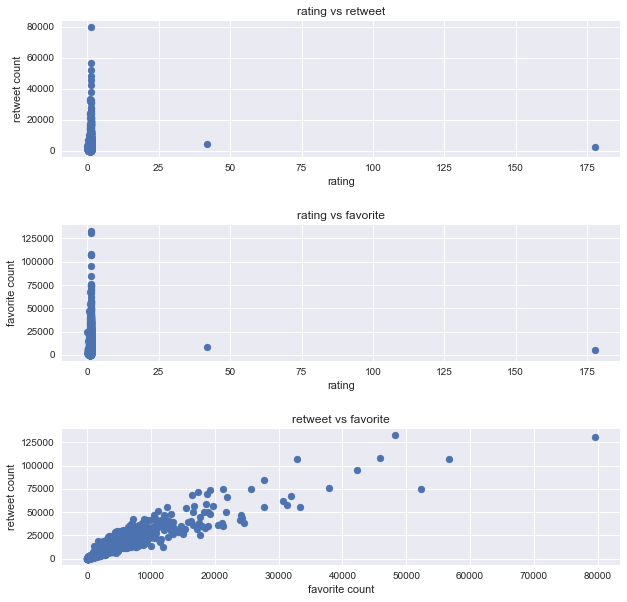

In [41]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
ax1.scatter(df_analysis1['rating'],df_analysis1['retweet_count'])
ax1.set_title('rating vs retweet')
ax1.set_xlabel('rating')
ax1.set_ylabel('retweet count')
ax2.scatter(df_analysis1['rating'], df_analysis1['favorite_count'] )
ax2.set_title('rating vs favorite')
ax2.set_xlabel('rating')
ax2.set_ylabel('favorite count')
ax3.scatter(df_analysis1['retweet_count'], df_analysis1['favorite_count'] )
ax3.set_title('retweet vs favorite')
ax3.set_xlabel('favorite count')
ax3.set_ylabel('retweet count')
plt.subplots_adjust(hspace=0.5)
plt.show()

As shown, it is only retweet vs favorite that have high correlation. This is makes sense as both are cue of positive perception of the tweet.

#### Insight 3 - Most High Favourited Dog Stage

In [85]:
counts = df_analysis1[['stage', 'favorite_count']].groupby('stage')['favorite_count'].sum().sort_values(ascending=False)

It clearly shows that pupper is the most favorited dog stage.

In [86]:
counts

stage
pupper          1602179
doggo           1300334
puppo            497319
doggopupper      113732
floofer           99580
doggopuppo        47844
doggofloofer      17169
Name: favorite_count, dtype: int64

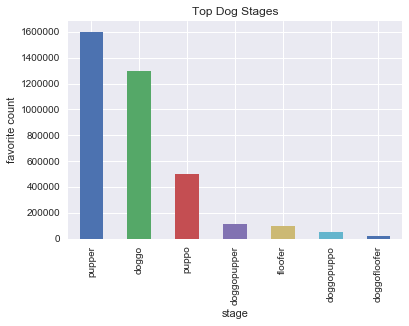

In [87]:
bar_plot = counts.plot.bar(title="Top Dog Stages");
bar_plot.set_ylabel("favorite count");

#### Insight 4 - Can we predict number of favorites received?

In [81]:
counts = df_analysis1['stage'].value_counts()

In [83]:
counts = (df_analysis1[['stage', 'favorite_count']].groupby('stage')['favorite_count'].sum()/df_analysis1['stage'].value_counts()).sort_values(ascending=False)

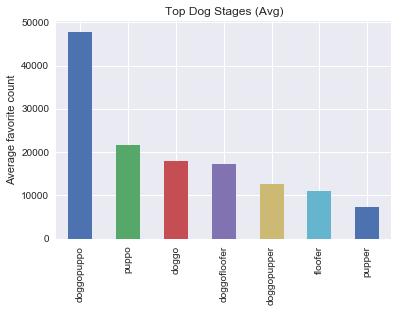

In [84]:
bar_plot = counts.plot.bar(title="Top Dog Stages (Avg)");
bar_plot.set_ylabel("Average favorite count");

In [82]:
counts

pupper          221
doggo            72
puppo            23
doggopupper       9
floofer           9
doggofloofer      1
doggopuppo        1
Name: stage, dtype: int64

In [57]:
df_analysis1.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 2096 entries, 0 to 2095
Data columns (total 12 columns):
tweet_id              2096 non-null object
timestamp             2096 non-null object
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
name                  1389 non-null object
stage                 336 non-null object
retweet_count         2096 non-null object
favorite_count        2096 non-null object
rating                2096 non-null float64
dtypes: float64(3), object(9)
memory usage: 212.9+ KB


In [58]:
# Number variables that is might be related
num_vars = df_analysis1[['rating_numerator', 'rating_denominator', 'rating', 'retweet_count', 'favorite_count']]

# check the model using num vars only
X = num_vars[['rating_numerator', 'rating_denominator', 'rating', 'retweet_count']]
y = num_vars[['favorite_count']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

&#39;The r-squared score for the model using only quantitative variables was 0.8449964689012452 on 629 values.&#39;

In [60]:
cat_vars = df_analysis1[['stage', 'source']]

# This function copied from the classroom
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

#Combine the two subset
all_vars = cat_vars.append(num_vars)

all_vars = create_dummy_df(all_vars, ['stage', 'source'], dummy_na=False)

In [61]:
all_vars.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 4192 entries, 0 to 2095
Data columns (total 14 columns):
favorite_count                2096 non-null object
rating                        2096 non-null float64
rating_denominator            2096 non-null float64
rating_numerator              2096 non-null float64
retweet_count                 2096 non-null object
stage_doggofloofer            4192 non-null uint8
stage_doggopupper             4192 non-null uint8
stage_doggopuppo              4192 non-null uint8
stage_floofer                 4192 non-null uint8
stage_pupper                  4192 non-null uint8
stage_puppo                   4192 non-null uint8
source_Twitter Web Client     4192 non-null uint8
source_Twitter for iPhone     4192 non-null uint8
source_Vine - Make a Scene    4192 non-null uint8
dtypes: float64(3), object(2), uint8(9)
memory usage: 233.3+ KB


In [62]:
# Mean function
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
all_vars = all_vars.apply(fill_mean, axis=0)

all_vars.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 4192 entries, 0 to 2095
Data columns (total 14 columns):
favorite_count                4192 non-null float64
rating                        4192 non-null float64
rating_denominator            4192 non-null float64
rating_numerator              4192 non-null float64
retweet_count                 4192 non-null float64
stage_doggofloofer            4192 non-null uint8
stage_doggopupper             4192 non-null uint8
stage_doggopuppo              4192 non-null uint8
stage_floofer                 4192 non-null uint8
stage_pupper                  4192 non-null uint8
stage_puppo                   4192 non-null uint8
source_Twitter Web Client     4192 non-null uint8
source_Twitter for iPhone     4192 non-null uint8
source_Vine - Make a Scene    4192 non-null uint8
dtypes: float64(5), uint8(9)
memory usage: 233.3 KB


In [65]:
X = all_vars.drop('favorite_count', axis=1)
y = all_vars['favorite_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using both quantitative and categorical variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

&#39;The r-squared score for the model using both quantitative and categorical variables was 0.8414574882030121 on 1258 values.&#39;

In [64]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
0,rating,-997.066388,997.066388
1,rating_denominator,-128.441769,128.441769
2,rating_numerator,98.979119,98.979119
10,source_Twitter Web Client,36.214329,36.214329
11,source_Twitter for iPhone,36.211604,36.211604
12,source_Vine - Make a Scene,36.186777,36.186777
3,retweet_count,2.317215,2.317215
8,stage_pupper,0.260172,0.260172
7,stage_floofer,0.035779,0.035779
9,stage_puppo,0.027504,0.027504
